###The objective of this dataset would typically be to train a machine learning model to predict whether an email is spam or not
Rows: Each row represents an individual email.
Columns: The columns likely represent features extracted from the email bodies. There are 3000 columns containing words that are part of the email bodies.

##Importing necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

###Loading the dataset

In [4]:
df= pd.read_csv("emails.csv")

##Analyzing the dataset

In [5]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
# Checking if there is any null data
df.isnull().count()

Email No.     5172
the           5172
to            5172
ect           5172
and           5172
              ... 
military      5172
allowing      5172
ff            5172
dry           5172
Prediction    5172
Length: 3002, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


<Axes: >

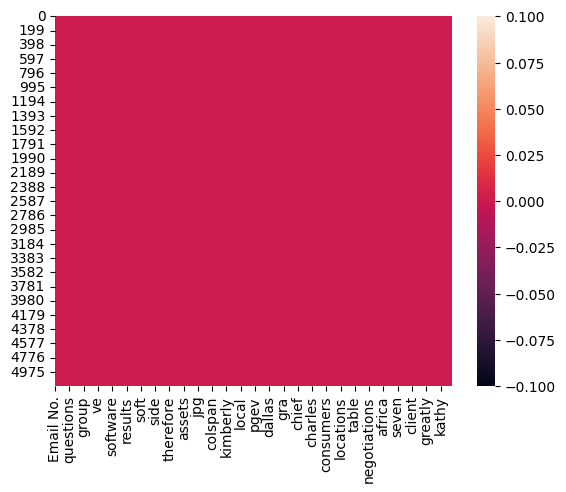

In [8]:
# Plotting null data in the heatmap
import seaborn as sns
sns.heatmap(df.isnull())

In [9]:
#Checking for unique data
df.nunique()

Email No.     5172
the             90
to              72
ect             90
and             53
              ... 
military         4
allowing         3
ff              23
dry              4
Prediction       2
Length: 3002, dtype: int64

In [10]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [11]:
df.shape

(5172, 3002)

In [12]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [13]:
df= df.iloc[:,1:]

In [14]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [15]:
x = df.iloc[:, :3000].values
x

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]])

In [16]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0])

##Splitting the data for Train and Test

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 1)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, criterion='gini')

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9400966183574879


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9400966183574879
Precision: 0.9402102182157169
Recall: 0.9400966183574879
F1-score: 0.9401493877397509

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       719
           1       0.90      0.91      0.90       316

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



##1) Accuracy: 94.01% of the predictions made by the model were correct.
##2) Precision: For class 0 (non-spam), 94.02% of the emails predicted as non-spam were actually non-spam. For class 1 (spam), 90% of the emails predicted as spam were actually spam.
##3) Recall: For class 0, 94.01% of the actual non-spam emails were correctly predicted as non-spam. For class 1, 91% of the actual spam emails were correctly predicted as spam.
##4) F1-score: This is the harmonic mean of precision and recall. It gives a balance between precision and recall. The F1-score for class 0 is 96% and for class 1 is 90%.
##Looking at the classification report, it seems that the model performs well in distinguishing between spam and non-spam emails, with high precision, recall, and F1-score for both classes. However, it's essential to consider the specific requirements of the application and potentially investigate any misclassifications or areas for improvement. Overall, it indicates a robust performance of the classification model on the given dataset.

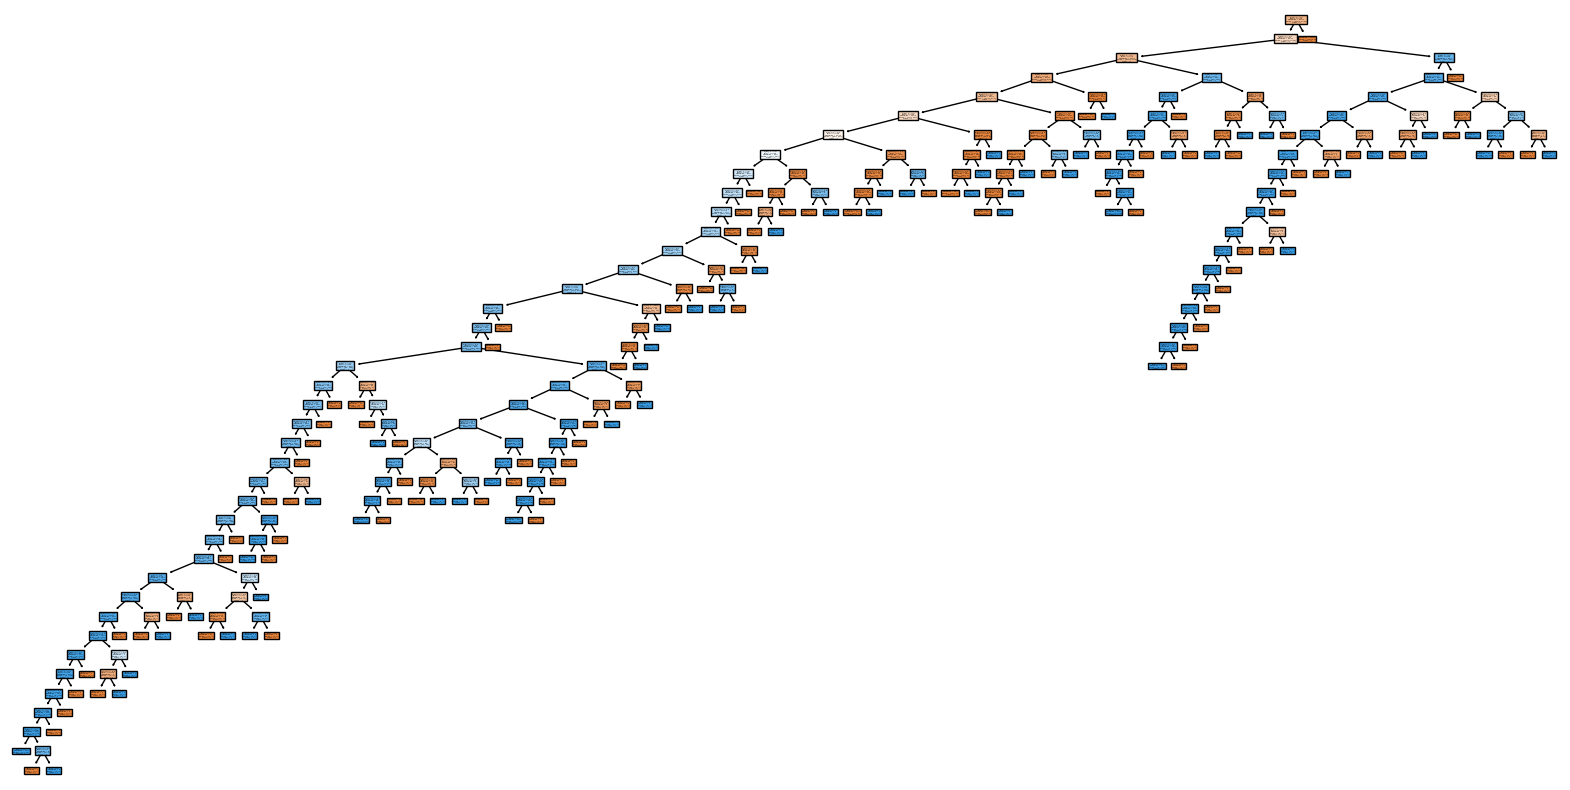

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Generate predictions using the decision tree classifier
predictions = dt_classifier.predict(x_test)

# Access the classes_ attribute to get the class names
class_names = dt_classifier.classes_.astype(str)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, class_names=class_names, filled=True)
plt.show()

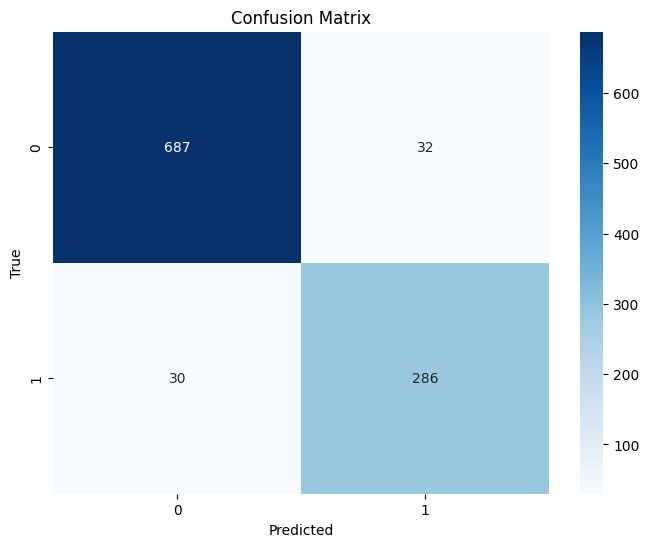

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(dt_classifier, x, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print mean cross-validation score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.91497585 0.91497585 0.92069632 0.92263056 0.87814313]
Mean cross-validation score: 0.9102843420327232


###These scores represent the performance of the model across different folds of the cross-validation process. Each score corresponds to the accuracy or performance metric (such as precision, recall, or F1-score) achieved on a particular fold of the data.

###The mean cross-validation score, calculated by averaging these individual scores, is 0.9102843420327232. This mean score provides an overall measure of how well the model generalizes to unseen data. In this case, it suggests that, on average, the model achieves an accuracy or performance metric score of approximately 91.03% across the different folds of the cross-validation process.

###Cross-validation is a technique used to assess the performance and generalization ability of a predictive model by splitting the dataset into multiple subsets, training the model on a portion of the data, and evaluating it on the remaining unseen data. The cross-validation scores help you understand how well your model performs on different parts of the dataset and provide insights into its stability and robustness.